In [2]:
%matplotlib notebook
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from data_loader import produce_dataset, get_dataloaders, dataset_plot
from train import *
from test_function import *
from model_nn import Koopman
import numpy as np
import torch
initial_out = sys.stdout

## Dataset generation

In [3]:
# create dataset (optional)
x_range = np.array([2.,2.,3])
u_range = np.array([20.,10.])
SimLength=20
Ntraj = 100000
Ts=0.01
path = produce_dataset(x_range,u_range,SimLength,Ntraj,Ts)
sys.stdout = initial_out
print(path)

  1%|          | 617/60000 [00:00<00:09, 5956.23it/s]

Start simulating...


100%|██████████| 20000/20000 [00:03<00:00, 5657.35it/s]


Dataset produced.
Dataset saved.
./dataset/state-[2. 2. 3.]_input-[20. 10.]_0.2x100000_Ts_0.01


<IPython.core.display.Javascript object>


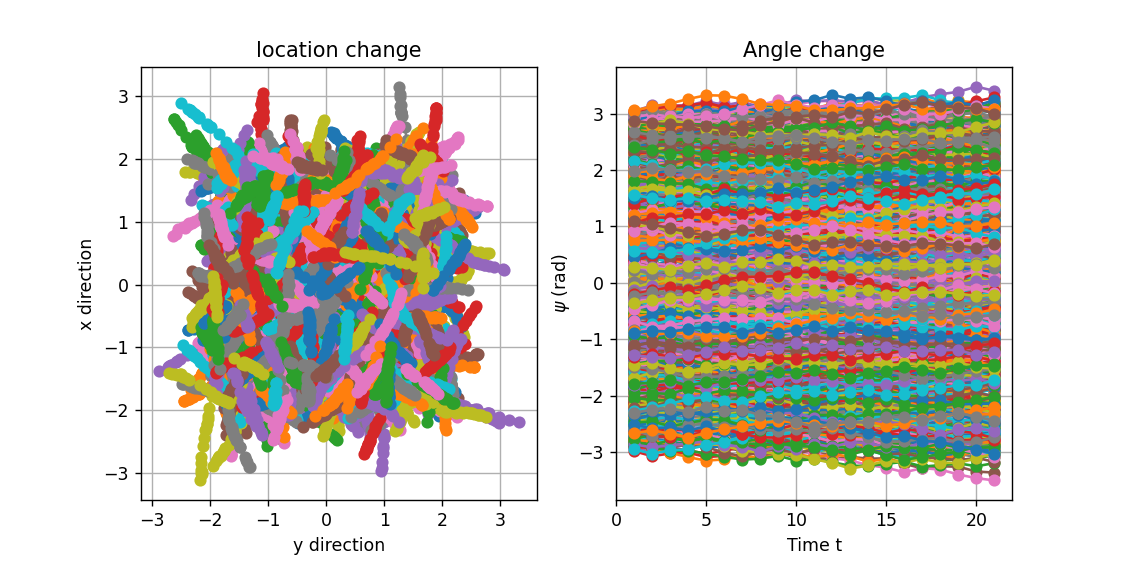

In [4]:
#path = './dataset/noise-0.1_dest-[5. 3.]_K-20_0.2x100000_Ts_0.01'
dataset_plot(path,num=1000)

## Model training

### Preparation

In [5]:
# get dataloaders
batch_size = 100
path = './dataset/state-[2. 2. 3.]_input-[20. 10.]_0.2x100000_Ts_0.01'
train_loader, val_loader, test_loader = get_dataloaders(path,batch_size)

### Initial baseline - from paper

  0%|          | 0/600 [00:00<?, ?it/s]

Trainer created.


Epoch 20: 100%|██████████| 600/600 [00:15<00:00, 37.76it/s, loss=0.234]


<IPython.core.display.Javascript object>


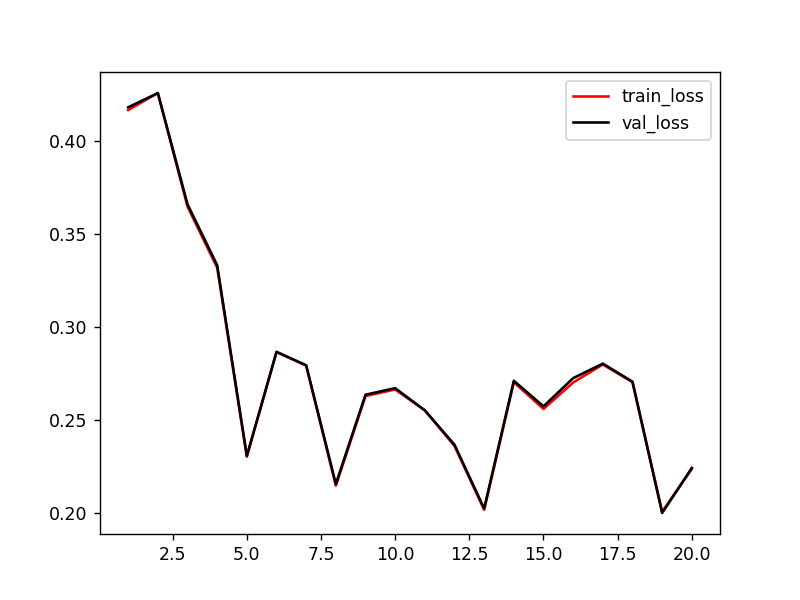

100%|██████████| 200/200 [00:04<00:00, 49.67it/s]


Loss score: 0.05054019205272198.
encoder_[3, 32, 64, 7]_decoder_[10, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 3]_batch_100


In [13]:
# get parameters
K = 7
arg = {
    'encoder':[3,32,64,K],
    'decoder':[K+3,128,64,32,3],
    'hyper':[1.0,1.0,0.3,0.000000001,0.000000001,0.000000001,3]
}

# start training
epochs=20
file_name = train_the_model(train_loader, val_loader, arg, batch_size, epochs)
plot_learning_curve(file_name)

# get test result
test_the_model(test_loader, file_name)
print(file_name)

### Varying length

In [ ]:
for i in range(3,8):
    # get parameters
    K = 7
    arg = {
        'encoder':[3,32,64,K],
        'decoder':[K+3,128,64,32,3],
        'hyper':[1.0,1.0,0.3,0.000000001,0.000000001,0.000000001,i]
    }

    # start training
    epochs=50
    file_name = train_the_model(train_loader, val_loader, arg, batch_size, epochs)
    plot_learning_curve(file_name)

    # get test result
    test_the_model(test_loader, file_name)
    print(file_name)

  0%|          | 0/600 [00:00<?, ?it/s]

Trainer created.


Epoch 25:  63%|██████▎   | 380/600 [00:10<00:05, 41.39it/s, loss=0.078]

### Varing regularisation

### Varying different loss

### Change model structure

#### Varying lifted state

#### Varying hidden nodes

#### Varying hidden layers

## Result Analysis

<IPython.core.display.Javascript object>


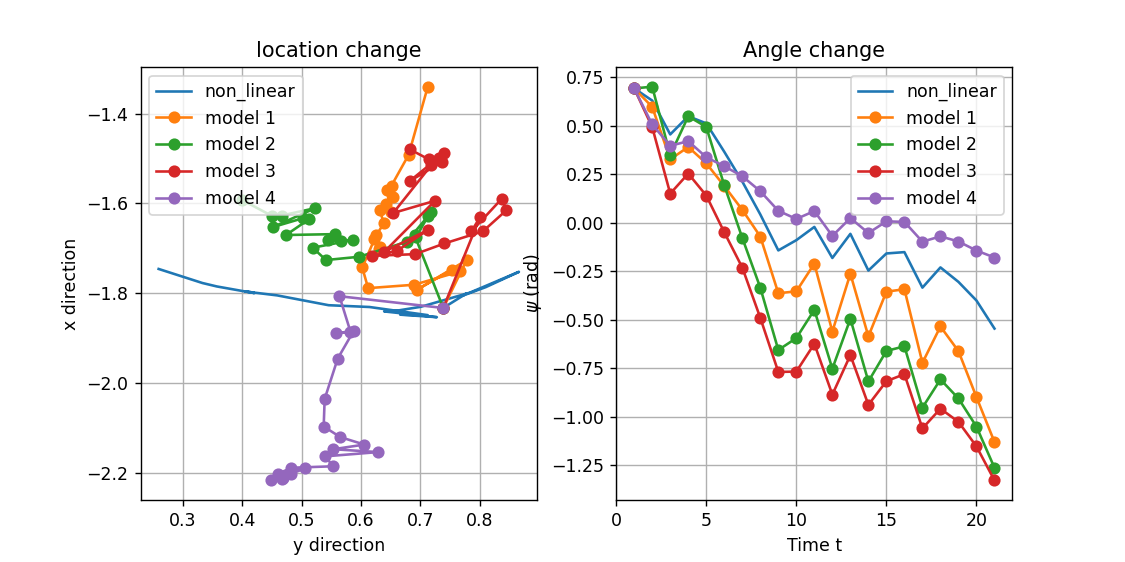

In [46]:
path = './dataset/state-[4. 4. 3.]_input-[20. 40.]_0.2x100000_Ts_0.01'
file_names = [
    #'encoder_[3, 32, 64, 7]_decoder_[10, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 3]_batch_100',
    #'encoder_[3, 32, 64, 7]_decoder_[10, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 1]_batch_100',
    'encoder_[3, 32, 64, 7]_decoder_[10, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 4]_batch_100',
    'encoder_[3, 32, 64, 7]_decoder_[10, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 5]_batch_100',
    'encoder_[3, 32, 64, 7]_decoder_[10, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 6]_batch_100',
    'encoder_[3, 32, 64, 7]_decoder_[10, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 7]_batch_100',
    #'encoder_[3, 32, 64, 7]_decoder_[10, 128, 64, 32, 3]_hyper_[1.0, 1.0, 0.3, 1e-09, 1e-09, 1e-09, 10]_batch_100'
]
result_sample(path,file_names,index=240)

In [8]:
xx = np.load(path+"/X_test.npy")
xx = xx[0,:,:]
xx = torch.tensor(xx).float()
xx = xx.unsqueeze(0)
x = xx[:,2,:]
print(x.shape)

torch.Size([1, 6])


In [8]:
index = 3
xx = np.load(path+"/X_test.npy")
uu = np.load(path+"/U_test.npy")
xx = xx[index]
uu = uu[index]
yy = xx[:-1]
print(xx.shape)
print(uu.shape)
print(yy.shape)

(101, 6)
(100, 3)
(100, 6)


In [3]:
for i, data in enumerate(test_loader):
    X, U=data
    X = X.to(device)
    U = U.to(device)
    loss = loss_function(model,X,U) 
print(U.shape)

torch.Size([1, 3, 100])


In [5]:
model = Koopman(hidden_layer=2)
submodules = []
for idx, m in enumerate(model.named_children()):
    submodules.append(m)
en = submodules[0][1]
de = submodules[1][1]
K = submodules[2][1]
print(en)

encoder(
  (input_layer): Sequential(
    (0): Linear(in_features=6, out_features=30, bias=True)
    (1): ReLU()
  )
  (hidden_layers): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ReLU()
  )
  (output_layer): Sequential(
    (0): Linear(in_features=30, out_features=30, bias=True)
    (1): ReLU()
  )
)


In [9]:
print(torch.cuda.device_count())

1


In [3]:
for name, param in model.named_parameters():
    print(param)

Parameter containing:
tensor([[ 0.1634, -0.1321, -0.3789, -0.2369,  0.2696,  0.2819],
        [-0.1659,  0.0839, -0.0814, -0.1603,  0.0260,  0.0618],
        [-0.2136,  0.2609,  0.2690,  0.0800,  0.1249,  0.2763],
        [ 0.1359, -0.0447,  0.0203, -0.1896,  0.2178,  0.1025],
        [ 0.2433, -0.3513, -0.2933, -0.1141, -0.3179,  0.3055],
        [-0.2136, -0.0317,  0.1539, -0.1149,  0.2557, -0.3906],
        [ 0.3235,  0.2800,  0.3244, -0.4045,  0.1815, -0.1580],
        [ 0.3538, -0.2212, -0.3395, -0.2431,  0.1884,  0.0690],
        [ 0.1700, -0.2066,  0.2711, -0.2969, -0.3780, -0.0643],
        [ 0.0086, -0.1699,  0.3263, -0.1935,  0.3561, -0.1834],
        [-0.2999, -0.2621,  0.2051, -0.0623,  0.2622,  0.3451],
        [ 0.0678, -0.2828, -0.0611, -0.0988,  0.2126, -0.0568],
        [ 0.2961, -0.1256,  0.0666, -0.1656, -0.2574, -0.3966],
        [ 0.1050,  0.0308,  0.3170, -0.3695, -0.3836,  0.2249],
        [-0.1642,  0.2283,  0.0361,  0.0120, -0.3436, -0.3950],
        [-0.2912, 

Parameter containing:
tensor([-0.0764, -0.1289, -0.1762, -0.1576,  0.0517, -0.1335,  0.0365,  0.1369,
        -0.1642,  0.0109,  0.0772,  0.0422,  0.0036,  0.1110,  0.0328, -0.1126,
         0.1392, -0.0331,  0.0291, -0.0660, -0.0830,  0.1390,  0.0785, -0.0264,
        -0.0855,  0.0725,  0.1374, -0.1720,  0.0512,  0.1843], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[-5.9328e-02,  6.1173e-05, -1.0362e-01, -3.4591e-02, -1.6624e-01,
          1.4674e-01, -9.2415e-03,  1.4375e-01,  1.4854e-01, -3.3646e-02,
          3.4771e-02,  6.5321e-03, -1.9188e-01, -1.3557e-01, -3.5404e-02,
         -4.9992e-02,  1.6556e-01,  6.5627e-03,  1.6790e-01,  1.1053e-01,
         -4.8428e-02, -1.1812e-01,  5.1682e-02, -1.9632e-01,  1.4156e-01,
          8.3279e-02, -5.3231e-02,  6.6371e-02, -1.5765e-01,  9.4691e-02],
        [-1.1652e-01, -1.2235e-01,  1.3065e-01, -2.9942e-02, -1.4474e-01,
          1.0060e-01,  1.1060e-01, -3.8935e-02, -7.4191e-02, -9.3466e-03,
          5.3858

Parameter containing:
tensor([-0.0567,  0.1349, -0.0141, -0.0881, -0.1290, -0.0458,  0.1863, -0.0949,
         0.1289, -0.1515, -0.1733, -0.1752, -0.1665,  0.0457,  0.0643, -0.1201,
        -0.0595, -0.1435,  0.1932, -0.1162,  0.1427, -0.1748,  0.0586,  0.1530,
         0.1622,  0.1200, -0.0302,  0.0573,  0.0075,  0.0105], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[-7.9286e-02,  8.0532e-02, -5.4395e-03, -1.0054e-01,  9.9546e-02,
          1.4527e-01,  2.6148e-02, -8.0447e-02, -2.1241e-02, -3.7661e-02,
         -1.0699e-01, -5.9146e-02,  1.4495e-01,  1.2502e-01,  1.7651e-01,
         -9.3032e-02,  3.0874e-02, -1.4122e-01,  5.5096e-02, -1.4797e-01,
          1.2387e-01, -1.0087e-01,  1.3244e-01, -4.5508e-02,  1.6836e-01,
          1.7689e-02,  5.7649e-02,  4.6980e-02, -9.6370e-03,  7.8076e-02],
        [ 3.8323e-02, -1.3968e-01, -1.0315e-01,  8.5497e-03,  1.1352e-01,
         -5.1236e-02,  9.8055e-02,  3.0196e-02,  5.6909e-02, -1.8875e-02,
         -1.5386

Parameter containing:
tensor([-0.0373,  0.0937,  0.2009, -0.1361,  0.1344,  0.0563, -0.1746, -0.1203,
         0.0369, -0.0988, -0.1224,  0.0881,  0.0327, -0.0837, -0.1005, -0.1626,
        -0.1777,  0.0359,  0.1043, -0.1484, -0.0464, -0.0693,  0.0756,  0.1025,
        -0.0698,  0.0608,  0.0874,  0.0741,  0.0883,  0.1011], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[ 1.7384e-01,  1.6538e-01, -5.1024e-02, -6.3549e-02, -1.8915e-01,
          8.7577e-03, -1.2549e-01,  7.2616e-04, -3.7742e-02, -3.1137e-02,
         -4.6134e-02,  3.7959e-02,  4.4066e-02, -8.7672e-02,  7.5773e-02,
         -1.6159e-01,  1.3070e-01,  1.5773e-02, -4.5569e-02, -1.5639e-01,
         -1.7516e-01,  5.9305e-02,  5.7551e-02,  6.8502e-02,  1.1797e-01,
         -3.1623e-02, -4.6658e-02,  1.1292e-01, -1.6779e-01, -4.6878e-02],
        [ 9.2049e-02,  7.5946e-02,  7.4613e-02, -4.9273e-02, -9.4913e-02,
          1.0834e-01,  6.1824e-02, -1.3730e-01,  8.6739e-02,  8.2199e-02,
          1.5313

Parameter containing:
tensor([ 0.0287, -0.1103, -0.1092,  0.0461, -0.1578, -0.1349, -0.1407, -0.0610,
        -0.1346,  0.0398, -0.0198, -0.0783, -0.1665,  0.1629, -0.0674, -0.1237,
         0.0739,  0.0409,  0.0911,  0.0264, -0.1458,  0.0900, -0.1254, -0.0105,
        -0.0138,  0.1018, -0.0130, -0.0141,  0.1948, -0.1159], device='cuda:0',
       requires_grad=True)
Parameter containing:
tensor([[-0.1268, -0.0607, -0.0758,  0.0946,  0.0115, -0.1144,  0.0181,  0.1138,
          0.1610,  0.0093, -0.1093, -0.1221,  0.1716, -0.1244,  0.1777,  0.1340,
         -0.0645, -0.1219,  0.1560,  0.0936,  0.0255,  0.0956,  0.0204,  0.1668,
         -0.1237, -0.0831,  0.0680,  0.1607,  0.1477,  0.0012],
        [-0.1511,  0.0669,  0.0739, -0.1723, -0.0558, -0.1579, -0.0570,  0.1393,
         -0.0920,  0.0890, -0.0818, -0.1684,  0.1463,  0.0822, -0.0679, -0.0899,
         -0.1312, -0.1168, -0.0601, -0.1698, -0.0023,  0.0540,  0.0483,  0.0702,
          0.1077,  0.0448,  0.0478,  0.0066, -0.0725, -0.00

In [36]:
xx = np.load("./dataset/state-[4. 4. 3.]_input-[200. 200.]_0.05x100000_Ts_0.01/X_test.npy")
xx = xx[0]
print(xx.shape[0])

6
